In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from scipy.interpolate import Rbf
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import make_lsq_spline, BSpline

In [35]:
error=0.0005
lower=485
upper=1200
Num=600
num=200
Frame=230
tt='reflect'
cmapt='hot'
typ='linear'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500','0750']
label=['A','B','C']
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=[0.133,0.15,0.296,0.44]
for x in xzs:
    yt=[]
    ytn=[]
    for k in ['AL-B','AL-A']:
            T={}
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                        if column>x-error and column<x+error:
                            y=df.loc[column].values[0]
                            #print(y)
                            ys.append(y)
                            yns.append(y)
                            break
                except Exception as e:
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    yns.append(np.nan)
                    pass
            T['{}'.format]=yns
            TT=DataFrame(T)
            TTT=TT.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
            Yns=TTT.values
            yt.append(ys)
            ytn.append(Yns)
            #ytn.append(yns)
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
#df2=dff3.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
#df3.to_csv('EELxx_{}.csv'.format(x))
#df2.to_csv('EELxx_{}.csv'.format(x))
stelement=['AlB','AlA','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}
numbers.insert(6,1125)
#numbers.insert(-4,2625)
newn=numbers.copy()

In [22]:

numbers

[0,
 100,
 250,
 500,
 750,
 1000,
 1125,
 1250,
 1500,
 1750,
 2000,
 2250,
 2500,
 2625,
 2750,
 3000,
 3050,
 3100]

4 2


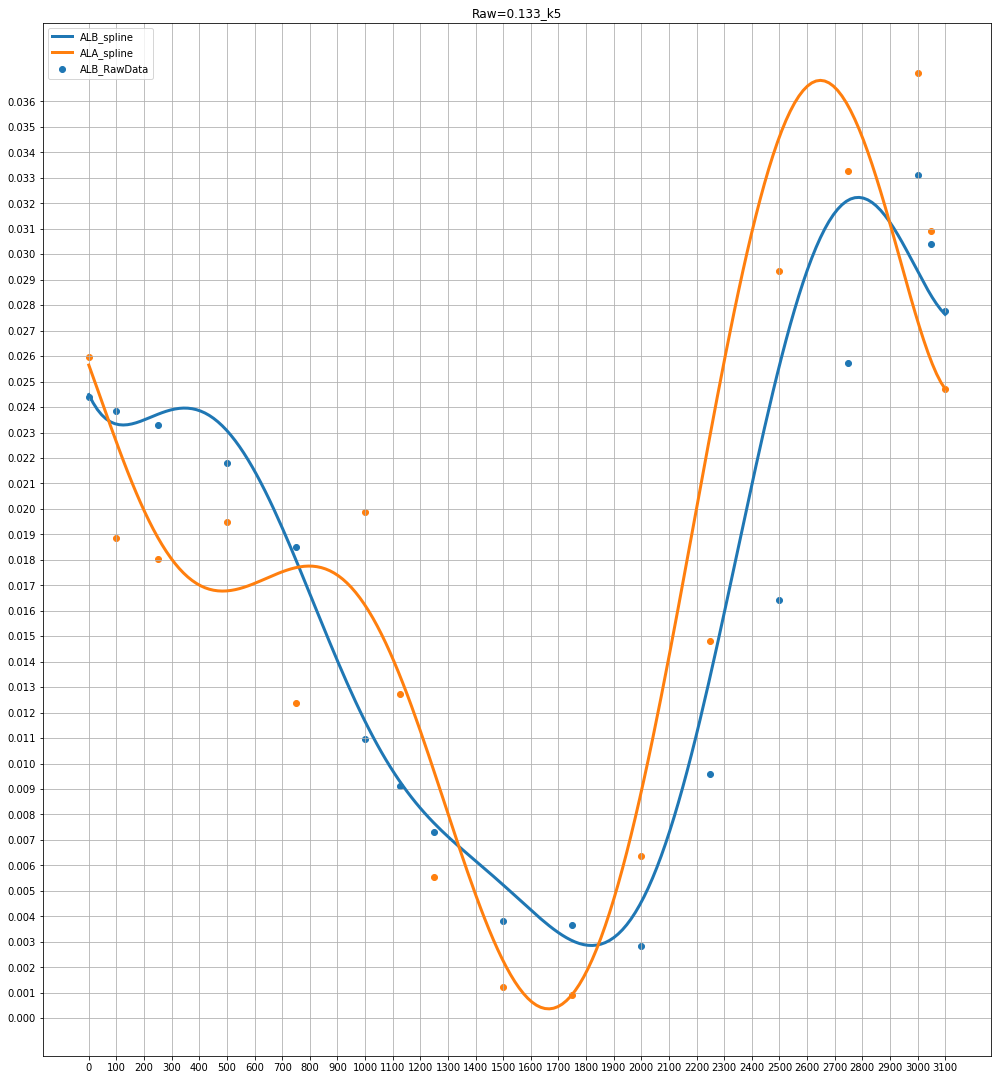

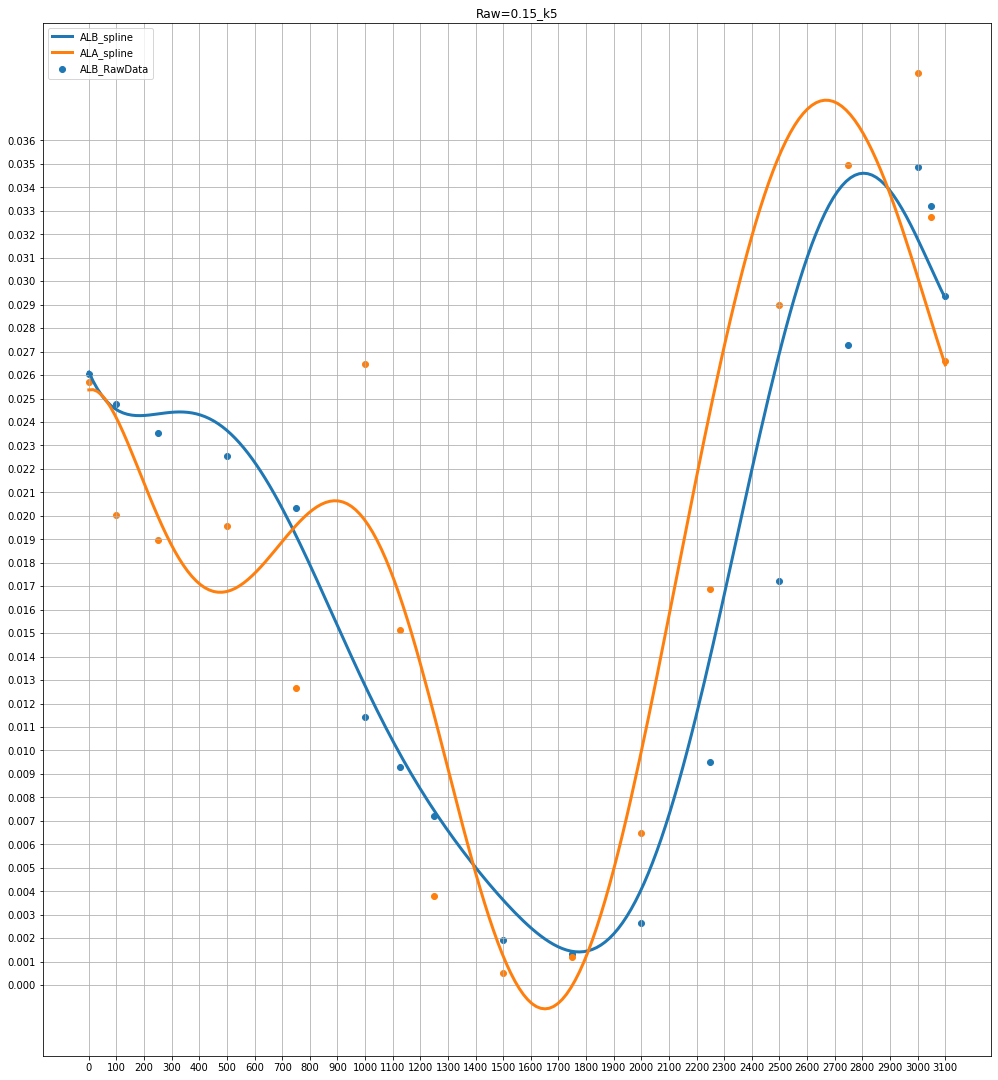

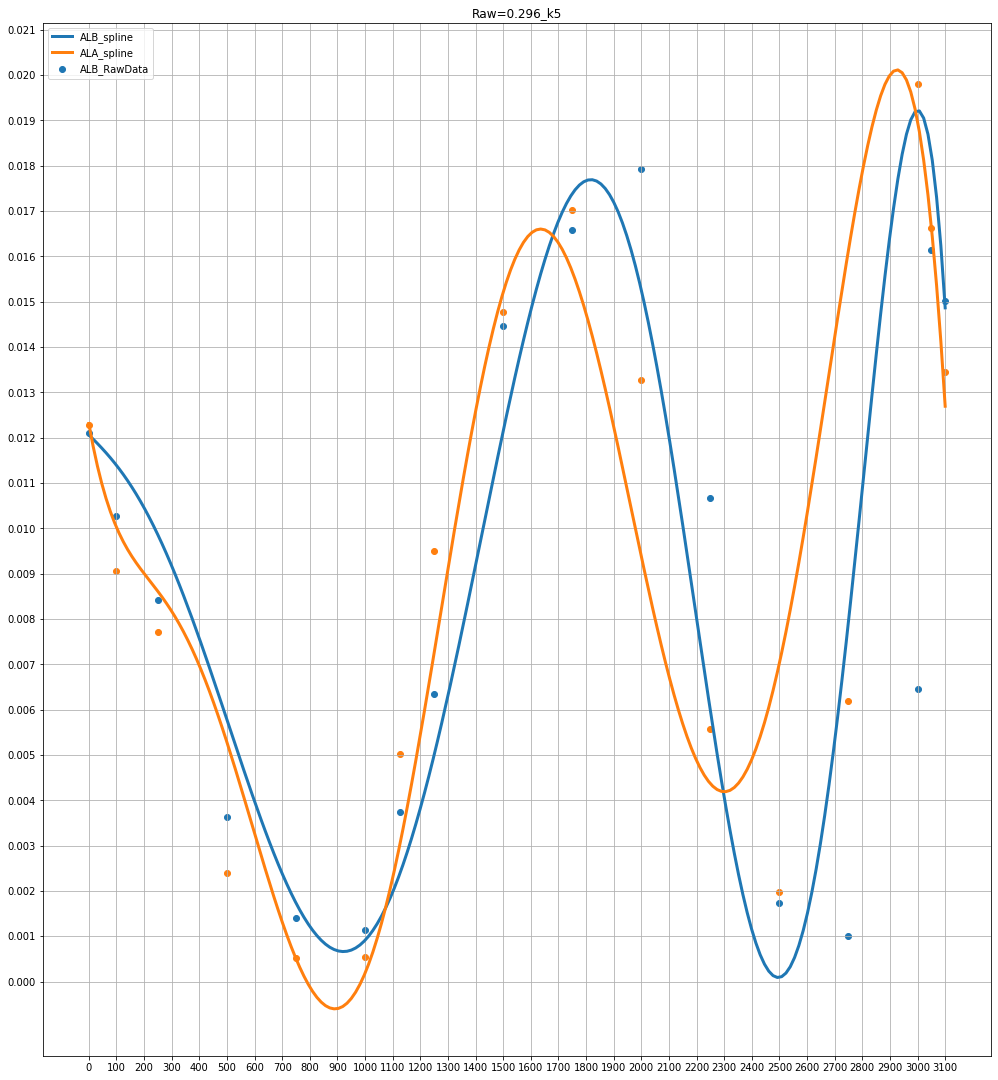

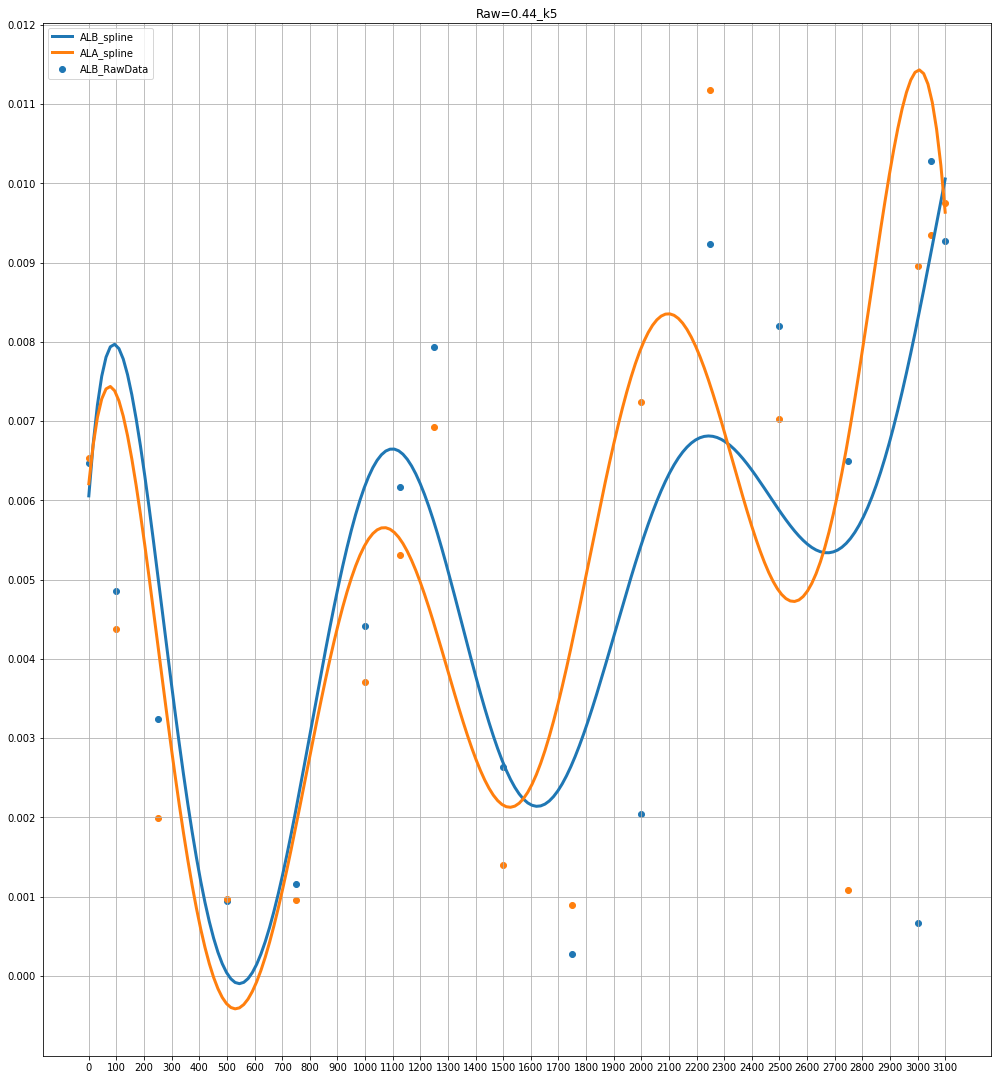

In [36]:
row,col=df2.shape
print(row,col)
ele=['AL-A','SiO2-A','SiO2-B','SiO2-C','SiC-A']
for i in range(1,row+1):
    fig= plt.figure(figsize=(17,19))
    for j in range(1,col+1):
        yn=df2.iloc[i-1:i,j-1:j].values[0][0].flatten()
        y=np.insert(yn,[6],[(yn[5]+yn[6])/2])
        plt.xticks(np.arange(0,3200,100))
        plt.yticks(np.arange(0,0.037,0.001))
        f = Rbf(numbers,y,kind='quintic')
        Xnew=np.linspace(-3,3, len(y))
        xnew=np.linspace(0,3100,num)
        t = [-1, 0, 1]
        k=5
        t = np.r_[(Xnew[0],)*(k+1),t,(Xnew[-1],)*(k+1)]
        spl = make_lsq_spline(Xnew, y, t, k)
        xs = np.linspace(-3, 3, num)
        plt.plot(xnew, spl(xs), lw=3)
        plt.legend(['ALB_spline','ALA_spline','ALB_RawData','ALA_RawData'])
        #plt.plot(xnew,f(xnew))
        plt.scatter(numbers,y)
        plt.title('Raw={}_k{}'.format(xzs[i-1],k))
        plt.grid('on')
        whole1['{}_{}'.format(i,j)]=f(xnew)
        whole2['{}_{}'.format(i,j)]=spl(xs)
        #plt.legend(['ALB_spline','ALA_spline','ALB_RBFline','ALA_RBFline','ALB_RawData','ALA_RawData'])
    #plt.savefig('Raw{}k={}.png'.format(i,k),bbox_inches='tight')
finaldf1 =DataFrame(whole1)
finaldf2 =DataFrame(whole2)

C:\Users\ROG\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


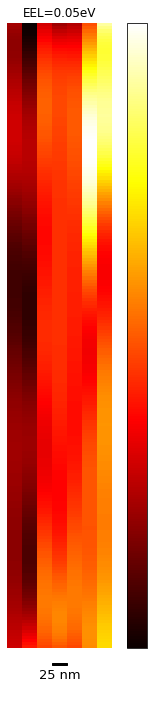

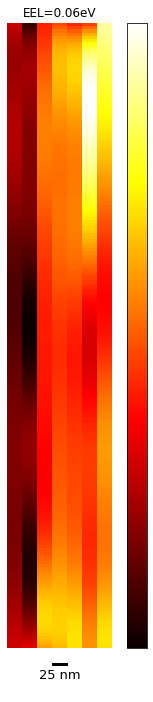

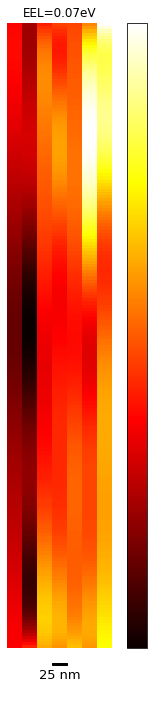

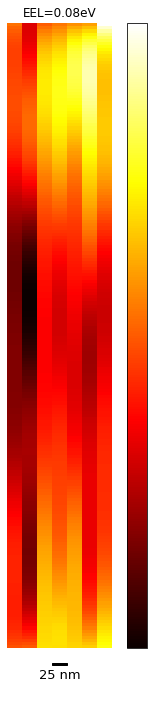

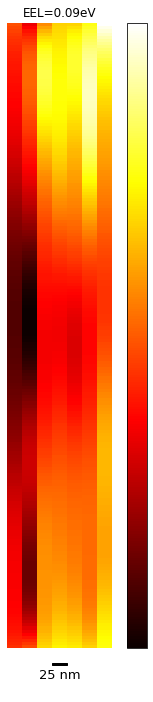

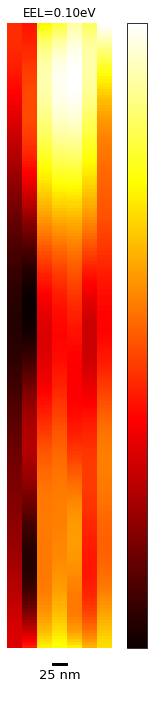

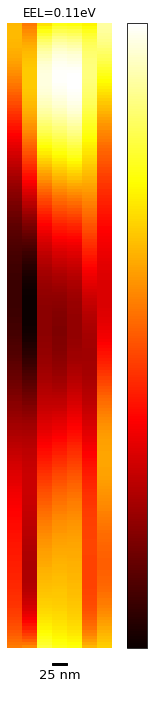

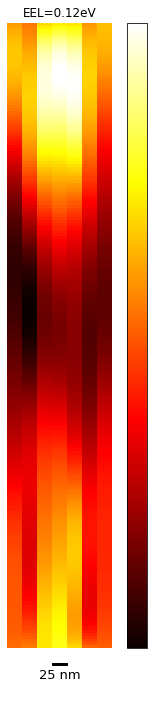

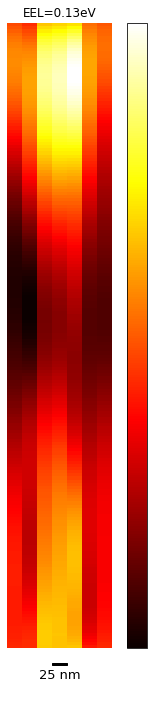

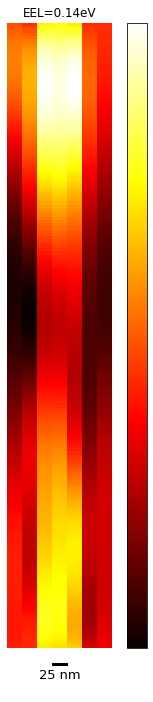

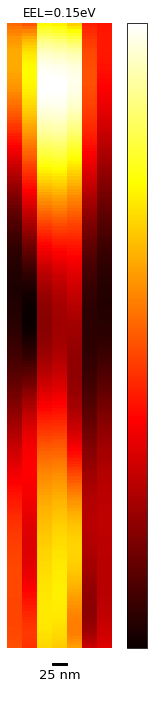

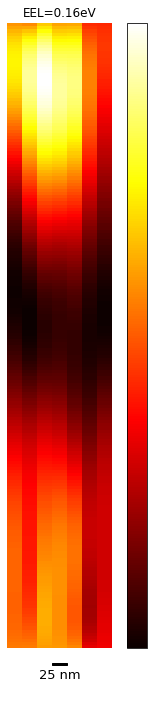

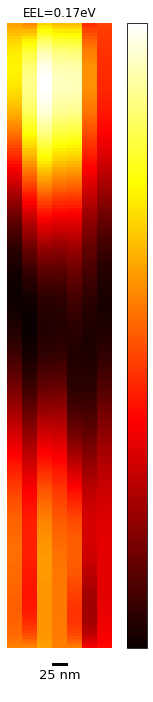

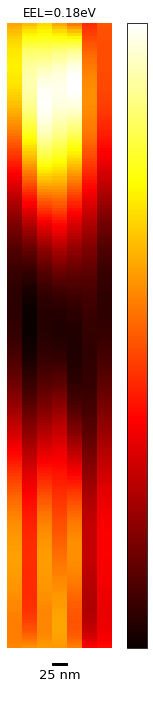

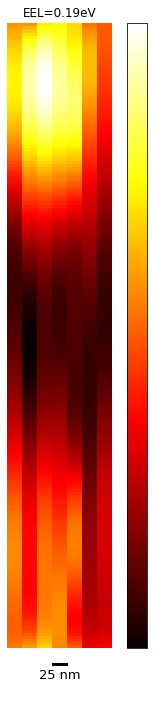

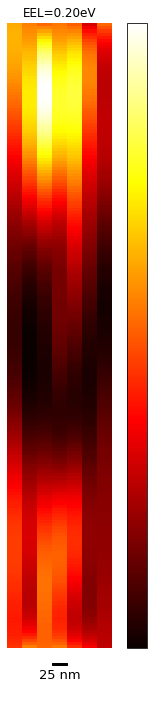

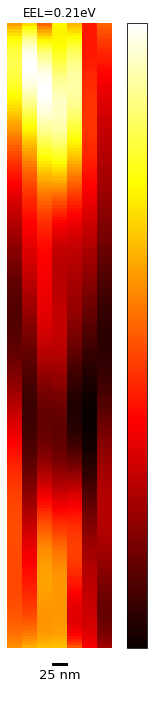

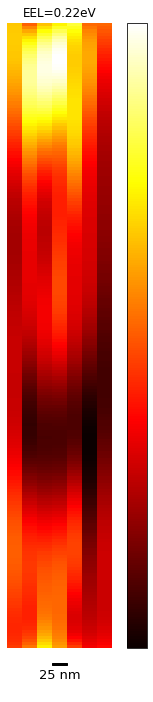

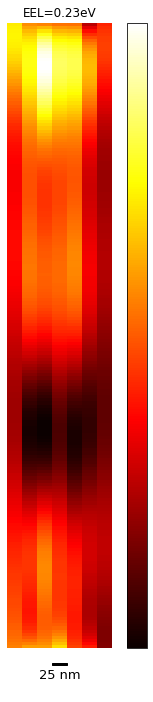

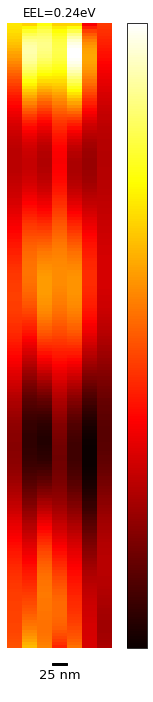

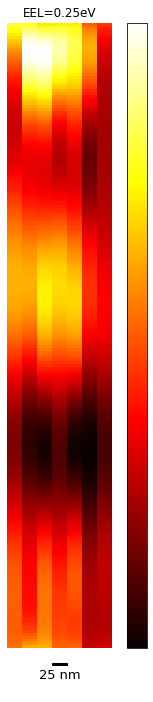

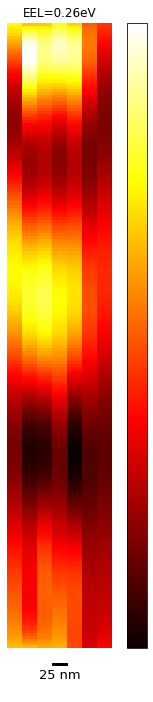

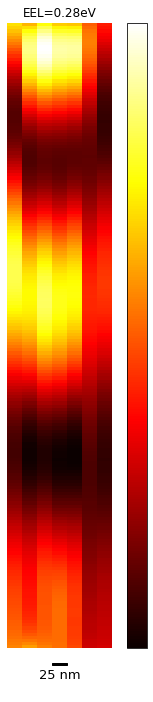

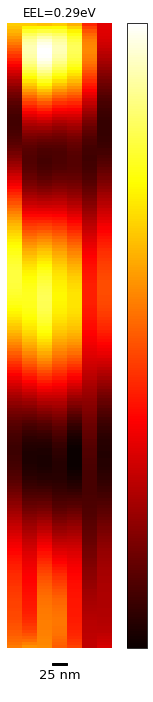

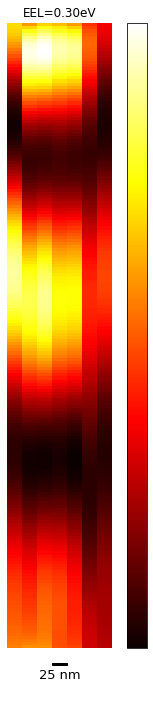

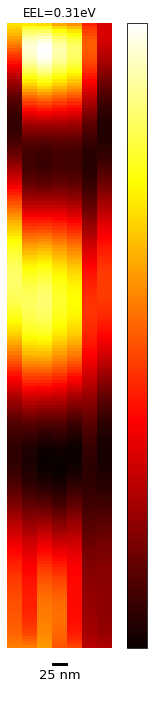

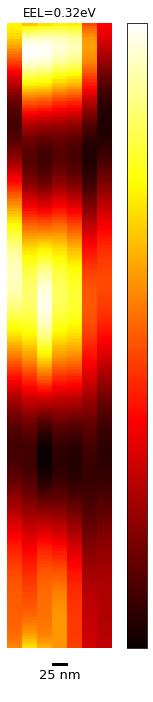

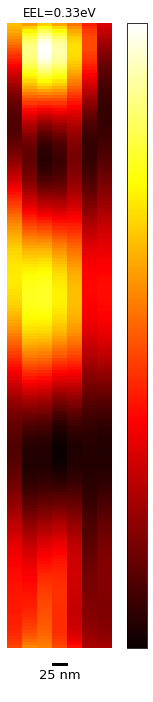

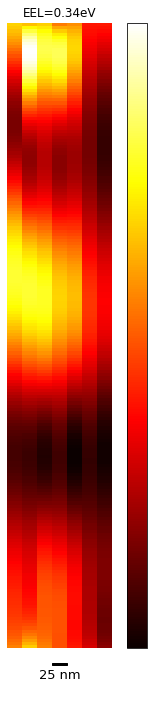

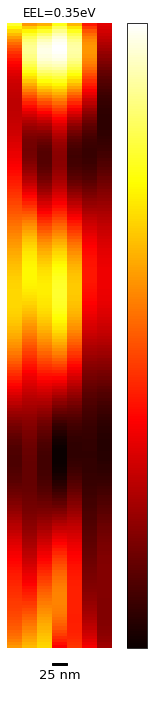

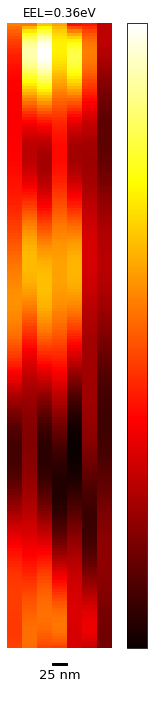

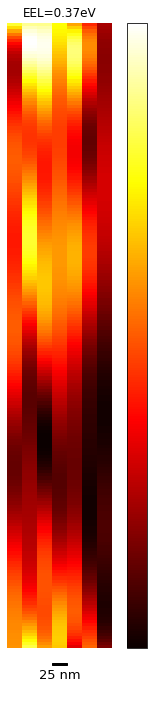

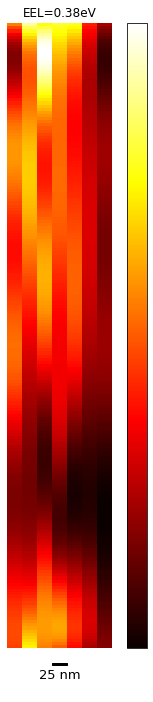

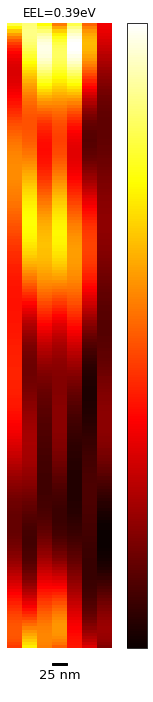

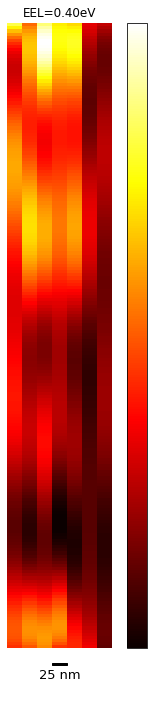

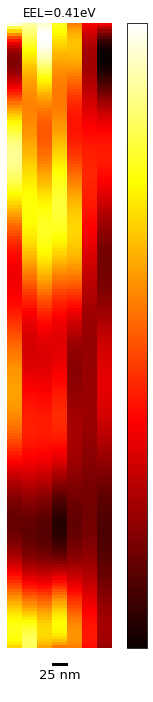

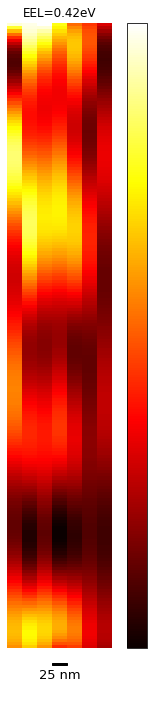

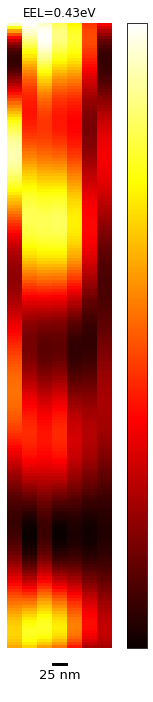

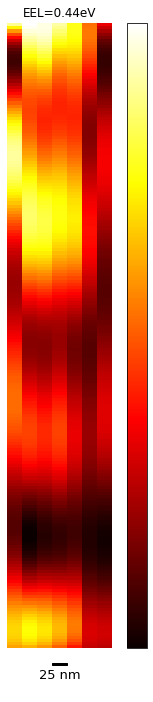

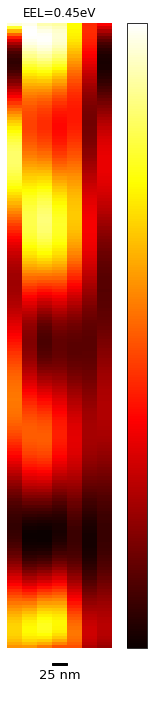

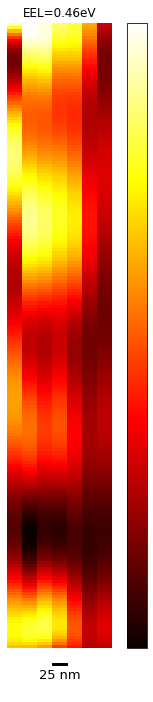

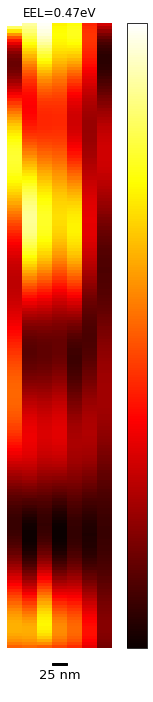

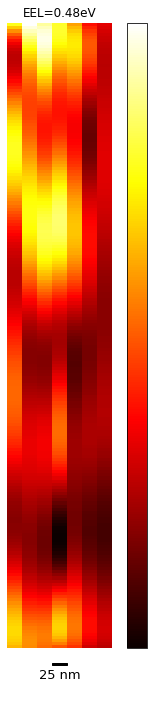

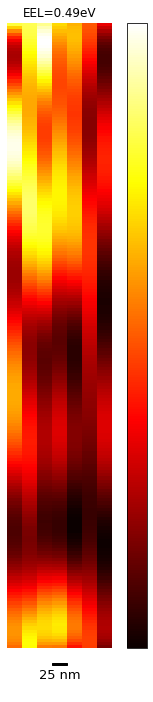

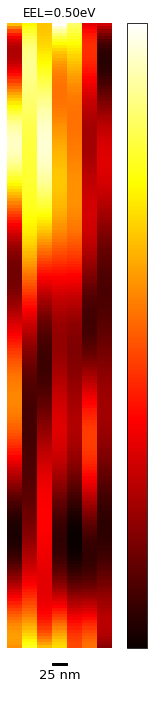

In [71]:
Row,Col=finaldf2.shape
for C in range(1,int(Col/7)+1):
    fig= plt.figure(figsize=(2.5,11.5))
    ax = fig.add_subplot(1,1,1)
    plt.axis('off')
    plt.title('EEL={}eV'.format("%.2f" % xzs[C-1]))
    F=finaldf2.iloc[:,(C-1)*7:C*7]
    img=plt.pcolor(F, linewidths=0,cmap='hot')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="19%", pad=0.2)
    cbar=plt.colorbar(img, cax=cax)
    cbar.set_ticks([])
    fontprops = fm.FontProperties(size=13)
    scalebar = AnchoredSizeBar(ax.transData,
                           0.95, '25 nm', 'upper right', 
                           pad=1,
                           color='black',borderpad=0.5, sep=4,
                           frameon=False,bbox_to_anchor=Bbox.from_bounds(0.64,0.13 , 0, 0),
                           size_vertical=0.5,bbox_transform=ax.figure.transFigure,
                           fontproperties=fontprops)
    ax.add_artist(scalebar)
    plt.savefig('EEL={}eV.png'.format("%.2f" % xzs[C-1]),bbox_inches='tight')

In [72]:
import cv2
import numpy as np
import glob
b,a=finaldf1.shape
col=a/7
print(col)
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(int(col)):
    for filename in glob.glob('EEL={}eV.png'.format("%.2f" % xzs[i])):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
out = cv2.VideoWriter('3050RawSpline.mp4'.format(Num,cmapt,Frame),cv2.VideoWriter_fourcc(*'DIVX'), 4, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

45.0


45

In [33]:
np.where?

In [44]:
i,=np.where(y==1.61779133e-03)

In [45]:
row,col=df2.shape
print(row,col)
ele=['AL-A','SiO2-A','SiO2-B','SiO2-C','SiC-A']
for i in range(1,row+1):
    for j in range(1,col+1):
        y=df2.iloc[i-1:i,j-1:j].values[0][0].flatten()
        print(y,len(y))


array([], dtype=int64)

In [46]:
class myarray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        return np.array(*args, **kwargs).view(myarray)
    def index(self, value):
        return np.where(self == value)

In [52]:
a = myarray(y)
i,=a.index(max(y))
y[i]=y[i]*0.8

In [56]:
y

array([1.47895707e-03, 7.81889482e-04, 9.55277244e-04, 9.76880004e-05,
       1.61779133e-03, 1.29936969e-03, 9.80948049e-04, 9.37542399e-04,
       4.75801265e-04, 9.92147453e-04, 1.24033181e-03, 1.05686673e-03,
       7.31909241e-04, 1.53351446e-03, 1.15820086e-03])